# Проект "Принятие решений в бизнесе"

**Цели и задачи:** 
- Задача проверить список подготовленных гипотез для увеличения выручки.
- Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## [Часть 1. Приоритезация гипотез](#stage_1)
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача
- [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#ice)

---

- [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#rice)

---

- [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло](#why)





## [Часть 2. Анализ A/B-теста](#stage_2)
Был проведёт A/B-тест и получены результаты, которые описаны в файлах orders.csv и visitors.csv.

### Анализ A/B-теста:

1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения](#stage_2_1)

---

2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#stage_2_2)

---

3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения](#stage_2_3)

---

4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения](#stage_2_4)

---

5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения](#stage_2_5)

---

6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения](#stage_2_6)

---

7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей](#stage_2_7)

--- 

8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения](#stage_2_8)

---

9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов](#stage_2_9)

---

10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_10)

---

11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_11)

---

12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_12)

---

13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_13)

---

14. [Примите решение по результатам теста и объясните его](#stage_2_14)



# Описание данных
## Файл hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


## Файл orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


## Файл visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="stage_1"></a>
## Часть 1. Приоритезация гипотез

Загрузка данных и импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
hypothesis = pd.read_csv(r'D:\Работа\Аналитик данных\Проекты\Принятие решений в бизнесе\hypothesis.csv')
orders = pd.read_csv(r'D:\Работа\Аналитик данных\Проекты\Принятие решений в бизнесе\orders.csv')
visitors = pd.read_csv(r'D:\Работа\Аналитик данных\Проекты\Принятие решений в бизнесе\visitors.csv')

In [4]:
for i in [hypothesis, orders, visitors]:
    display(i.head())
    display(i.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [5]:
hypothesis.columns = hypothesis.columns.str.lower() 

orders.columns = orders.columns.str.lower()

visitors.columns = visitors.columns.str.lower()

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [7]:
for i in [hypothesis, orders, visitors]:
    display(i.duplicated().sum())

0

0

0

In [8]:
for i in [hypothesis, orders, visitors]:
    display(i.isnull().sum(axis=0).sort_values(ascending=False))

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [9]:
display(len(orders['visitorid']))
display(orders['visitorid'].nunique())

1197

1031

<a name="ice"></a>
### Фреймворк ICE для приоритизации гипотез.

In [10]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

pd.options.display.max_colwidth = 1
hypothesis.sort_values('ICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


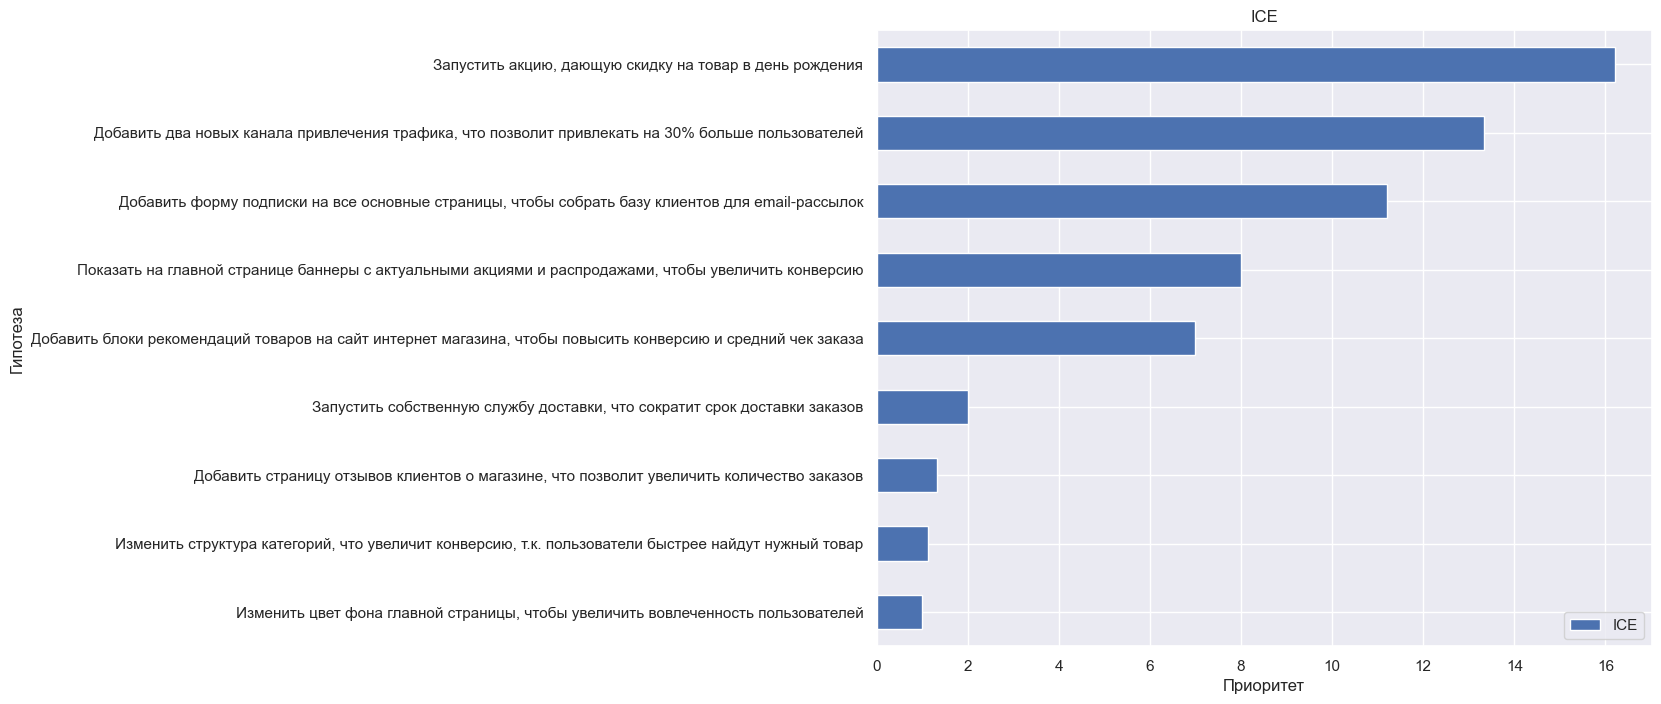

In [11]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

<a name="rice"></a>
### Фреймворк RICE для приоритизации гипотез.

In [12]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


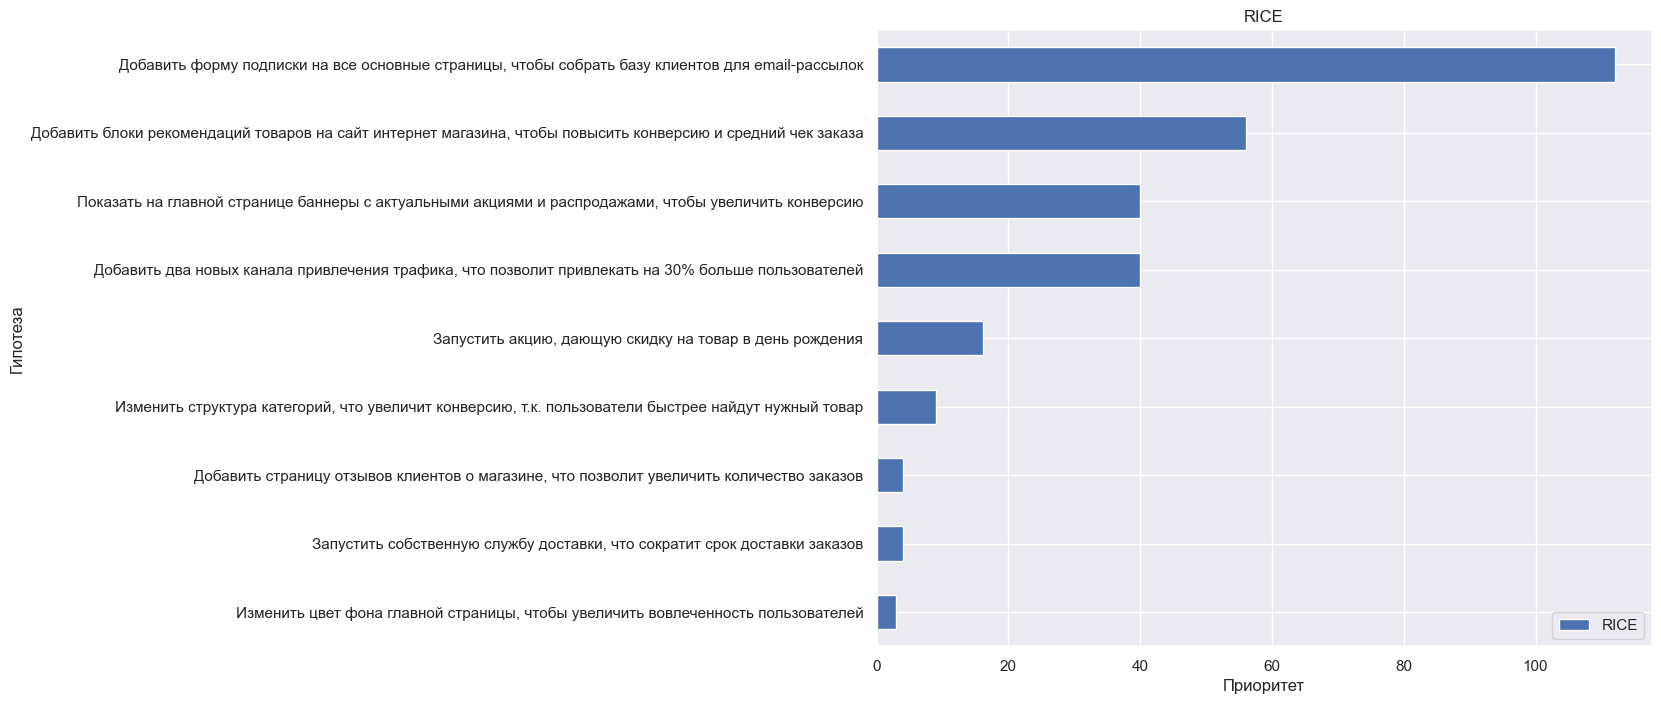

In [13]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

<a name="why"></a>
### Изменение приоритизации гипотез при применении RICE вместо ICE. Объяснение

В формуле RICE учитывается охват, а в ICE нет. Банально, но в данном случае это существенную роль. 

<a name="stage_2"></a>
## Часть 2. Анализ A/B-теста.

In [14]:
orders_g = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_g['group_copy'] = orders_g['group']
orders_g = orders_g.set_index(['date','group'])
orders_cs = orders_g.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [15]:

visitors_cs = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

visitors_cs['group_two'] = visitors_cs['group']
visitors_cs = visitors_cs.set_index(['date','group']).groupby('group_two').cumsum().reset_index() 

In [16]:
cs = orders_cs.join(visitors_cs[['visitors']])

In [17]:
cs['average_check'] = cs['revenue'] / cs['orders']
cs['conversion'] = cs['orders'] / cs['visitors']

In [18]:
cs.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


<div class="alert alert-block alert-success">

**Комментарий ревьювера (все отлично)**
    
Кумулятивные данные собраны.
</div>

<a name="stage_2_1"></a>
### График кумулятивной выручки по группам. 

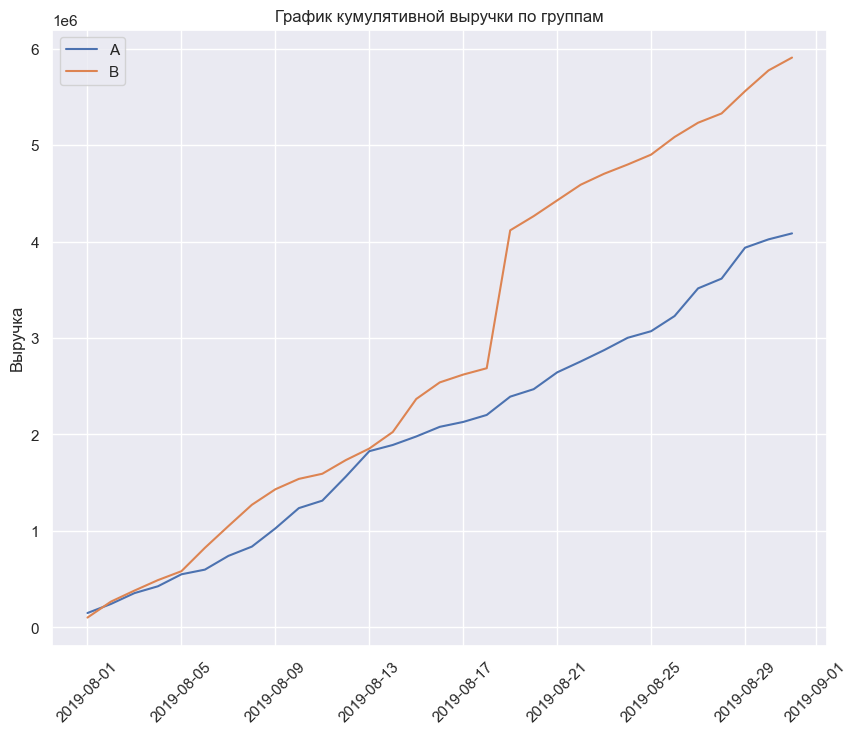

In [19]:
cs_a = cs[cs['group']=='A'][['date', 'revenue']]
cs_b = cs[cs['group']=='B'][['date', 'revenue']]
plt.plot(cs_a.iloc[:,0].to_frame(), cs_a.iloc[:,1].to_frame(), label='A' )
plt.plot(cs_b.iloc[:,0].to_frame(), cs_b.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Выводы и предположения.

Графики идут ровно, а потом В резво прыгает вверх. Что-то случилось в этой группе за короткий срок, скорее всего выброс, иначе графики бы себя вели иначе.

<a name="stage_2_2"></a>
### График кумулятивного среднего чека по группам.

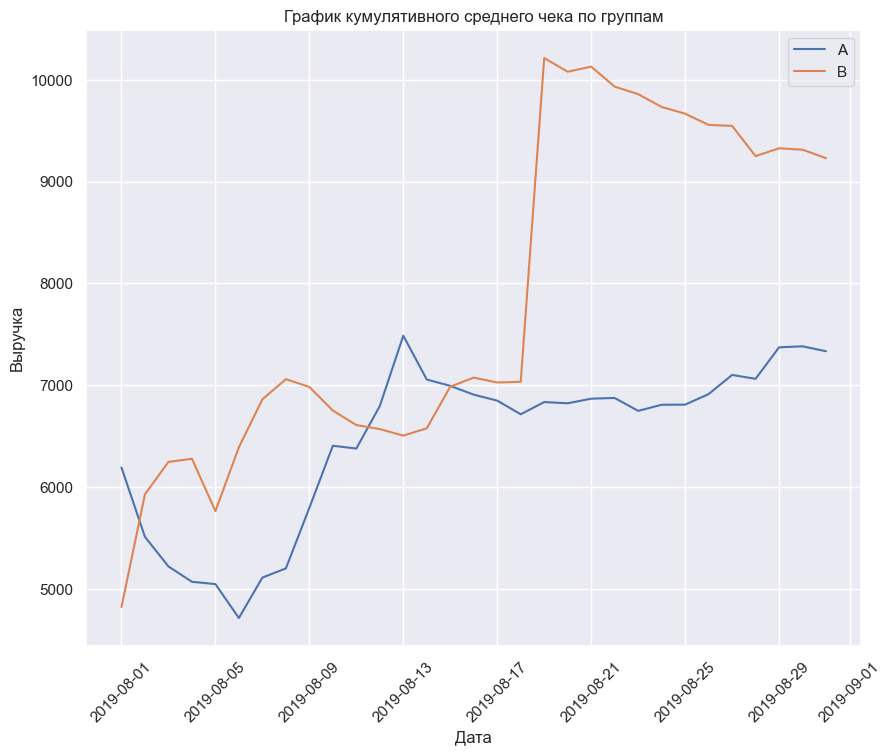

In [20]:
cs_a = cs[cs['group']=='A'][['date', 'average_check']]
cs_b = cs[cs['group']=='B'][['date', 'average_check']]
plt.plot(cs_a.iloc[:,0].to_frame(), cs_a.iloc[:,1].to_frame(), label='A' )
plt.plot(cs_b.iloc[:,0].to_frame(), cs_b.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Выводы и предположения.

данный график подтрвеждает выводы по предыдущему. 

<a name="stage_2_3"></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A.

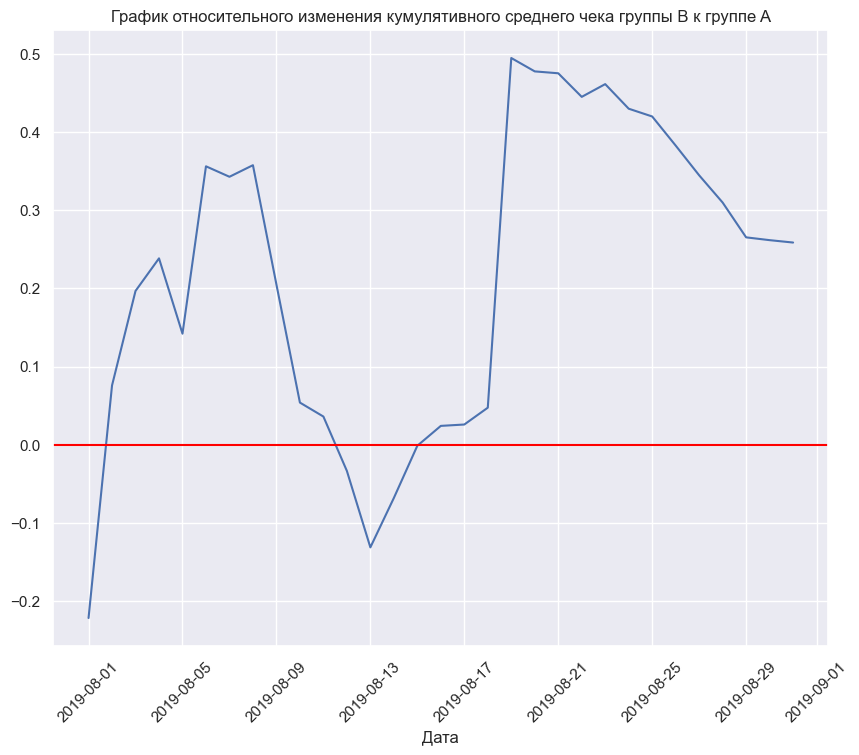

In [21]:
a_b = (cs_a[['date', 'average_check']].merge(cs_b[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_a', '_b']))
plt.plot(a_b['date'], a_b['average_check_b'] / a_b['average_check_a']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel("Дата")
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

#### Выводы и предположения.

График показывает всё то, что мы видили до этого. 

<a name="stage_2_4"></a>
### График кумулятивного среднего количества заказов на посетителя по группам.

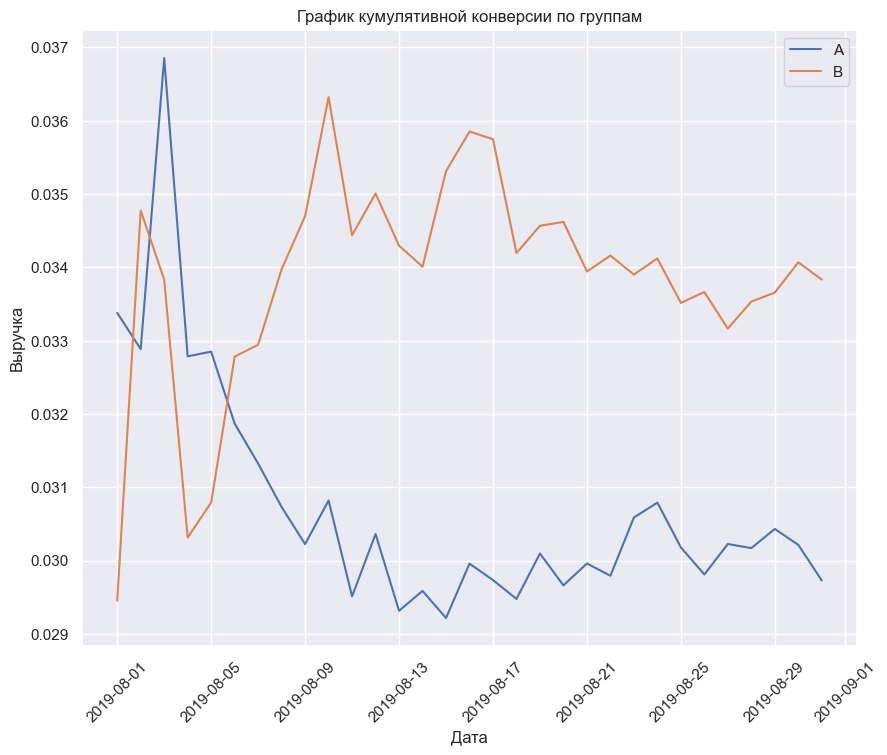

In [22]:
cs_a = cs[cs['group']=='A'][['date', 'conversion']]
cs_b = cs[cs['group']=='B'][['date', 'conversion']]
plt.plot(cs_a.iloc[:,0].to_frame(), cs_a.iloc[:,1].to_frame(), label='A' )
plt.plot(cs_b.iloc[:,0].to_frame(), cs_b.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Выводы и предположения.

Сначала графики болтало, но потом конверсия B показывает себя стабильно лучше. 

<a name="stage_2_5"></a>
### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

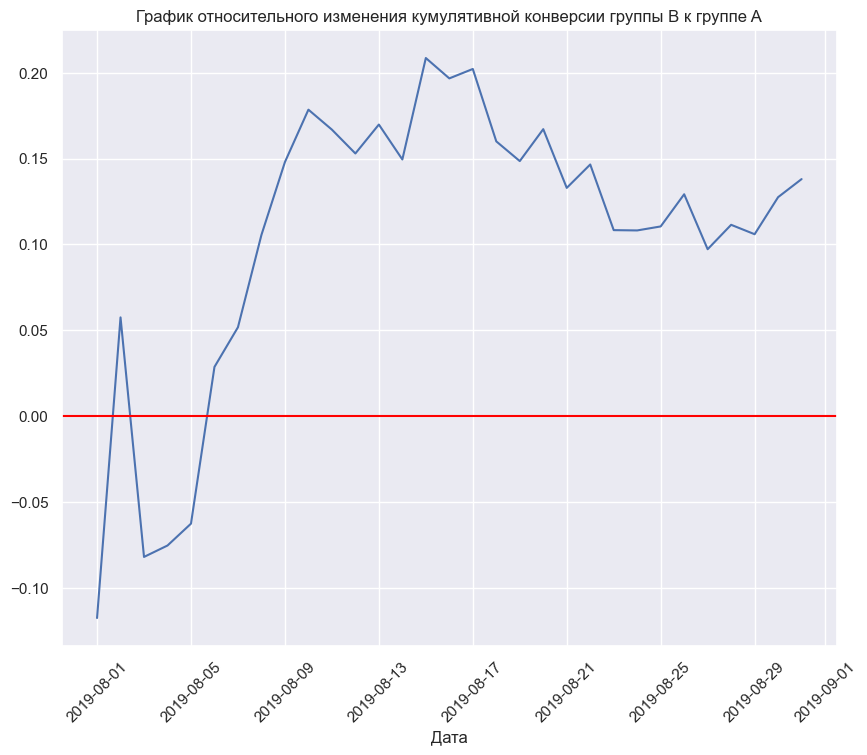

In [23]:
a_b = (cs_a[['date', 'conversion']].merge(cs_b[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(a_b['date'], a_b['conversion_B'] / a_b['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel("Дата")
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

#### Выводы и предположения.

Пока B конверсия смотрится хорошо, а главное стабильно.

<a name="stage_2_6"></a>
### Точечный график количества заказов по пользователям.

In [24]:
orders_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
orders_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


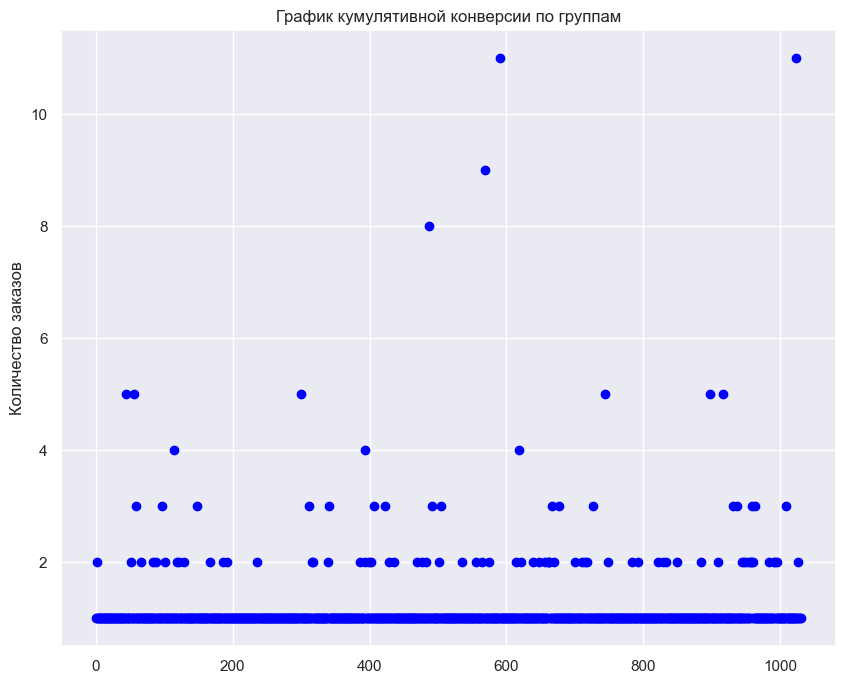

In [25]:
x_values = pd.Series(range(0,len(orders_user['orders'])))
plt.scatter(x_values, orders_user['orders'], color='blue')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Количество заказов")
plt.show()

#### Выводы и предположения.

У многих пользователей один заказ. У тех что 2 заказа встречаются реже, но кажется что это нормально. 
Видим тажке и отдельных пользователей у которых много заказывают и тем самым выделются из общем массы. 

<a name="stage_2_7"></a>
### Подсчёт 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [26]:
print('90 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [27]:
orders_user_new = orders_user[orders_user['orders'] >= 4]['visitorid'].to_list()

Будем считать что всё что выше 4 это аномалии, то есть за пределами 99 процентиля

<a name="stage_2_8"></a>
### Постройте точечный график стоимостей заказов.

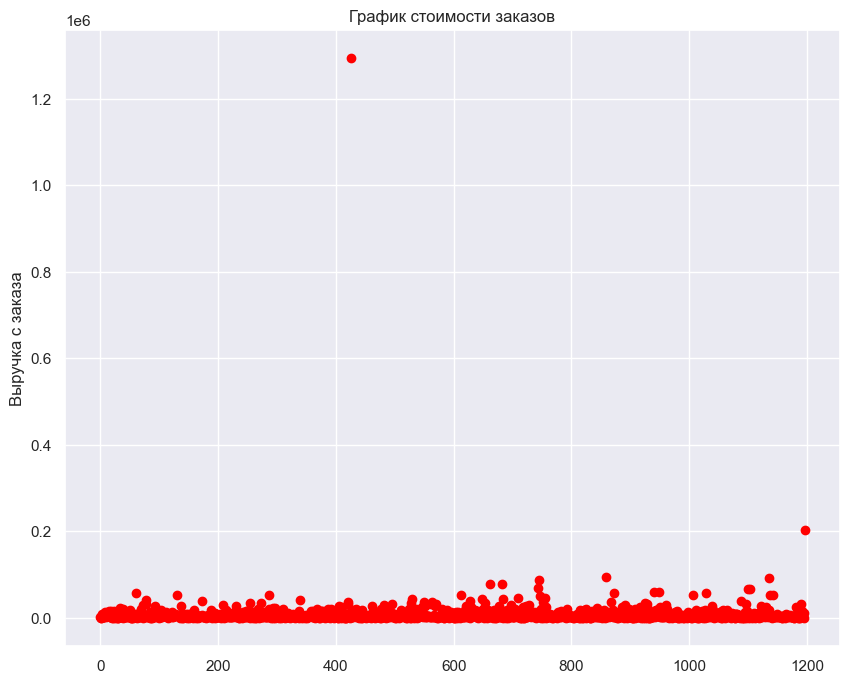

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('График стоимости заказов')
plt.ylabel("Выручка с заказа")
plt.show()

#### Выводы и предположения.

Здесь явные выбросы. Один, самый сильный как раз и мог повлиять на всю картину на графиках выше. 

<a name="stage_2_9"></a>
### Подсчёт 95-го и 99-го перцентиля стоимости заказов. Выбор границы для определения аномальных заказов.

In [29]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [30]:
orders['revenue'].max()

1294500

Все, что за 99 перцентилем — будем считать аномалией.

<a name="stage_2_10"></a>
### Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

<p>Воспользуемся критерием Манна-Уитни.</p>
<p>H0: Конверсия в группе A равна конверсии в группе B</p>
<p>H1: Конверсия в группе A НЕ равна конверсии в группе B</p>

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.149


In [32]:
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p-значение:  0.011308079133840975
Отвергаем H0: разница статистически значима
Средняя конверсия группы А: 1.5%
Средняя конверсия группы B: 1.7%


#### Выводы и предположения.

Конверсии А и В не равны. В больше А. Отвергаем H0

<a name="stage_2_11"></a>
### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

<p>Воспользуемся критерием Манна-Уитни</p>
<p>H0: Средний чек A НЕ больше среднего чека группы B</p>
<p>H1: Средний чек A больше среднего чека группы B</p>

In [33]:

alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.7292909855432458
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [34]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [35]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

#### Выводы и предположения.

Гипотезу не отвергаем.

<a name="stage_2_12"></a>
### Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [36]:
orders_two = orders[~orders['visitorid'].isin(orders_user_new)]
conversion_clear = (orders_two.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [37]:
orders_user[orders_user['orders'] >= 4]['visitorid'].to_list()

[199603092,
 237748145,
 457167155,
 1230306981,
 1614305549,
 2038680547,
 2378935119,
 2458001652,
 2587333274,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

In [38]:
orders_two

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


<p>Воспользуемся критерием Манна-Уитни.</p>
<p>H0: Конверсия в группе A равна конверсии в группе B</p>
<p>H1: Конверсия в группе A НЕ равна конверсии в группе B</p>

In [39]:
ordersByUsersA = (
    orders_two[orders_two['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders_two[orders_two['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.010
0.159


In [40]:
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p-значение:  0.01037420979651125
Отвергаем H0: разница статистически значима
Средняя конверсия группы А: 1.4%
Средняя конверсия группы B: 1.6%


#### Выводы и предположения.

B-конверсия превышает конверсию А. Результат стат. значим. 

<a name="stage_2_13"></a>
### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [41]:
orders_cl = orders.query('revenue <= 58233')

<p>Воспользуемся критерием Манна-Уитни</p>
<p>H0: Средний чек A не выше среднего чека группы B</p>
<p>H1: Средний чек A выше среднего чека группы B</p>

In [42]:
alpha = 0.05
results = st.mannwhitneyu(orders_cl[orders_cl['group']=='A']['revenue'], orders_cl[orders_cl['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.6208626966847455
Не получилось отвергнуть H0: вывод о различии сделать нельзя


#### Выводы и предположения.

Разница не такая значительная по итогу текста, чтобы отвергнуть гипотезу. 

<a name="stage_2_14"></a>
### Решение по результатам теста и объяснение. 


- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы В выше (на "очищенных" данных - на ~2%);

- График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А

**Рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).**